In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
epi_data_df = pd.read_hdf('../data/processed/epi_vector.h5')


In [117]:
sample_df = epi_data_df.head(9000)
# list(sample_df.columns.values)

In [118]:
sample_df.head(1)

,""" 00 "" (soft wheat) flour * or cake flour",""" 00 "" flour",""" 00 "" flour, divide",""" > chicken stock chicken broth",""" > panko (japanese bread crumb bread crumb",""" baby "" Pattypan squash",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" circular wire rack",...,ﬁne dry bread crumb,ﬁne salt,avg_rating,best_rating,worst_rating,prepare_again_rating,num_reviews,total_time,tags,title
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.5,4.0,0.0,0.85,25.0,0.0,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...","""Adult"" Pimiento Cheese"


In [158]:
# I manually took out tags that are not recipe ingredients.
cuisinetype = pd.read_csv('cuisinetype.txt',header=None)
cuisinetype = cuisinetype.transpose()
cuisinetype = np.array(cuisinetype[0])
cuisinetype = [x.replace('\'','') for x in cuisinetype]
# cuisinetype

In [159]:
states = pd.read_csv('states.csv',header=None)
states = states.transpose()
states = np.array(states[0])
states = [x.lstrip() for x in states]
# states

In [160]:
# I manually took out cities of USA in the tag list.
city = ['Los Angeles','Portland','Atlanta','San Francisco','Pittsburgh','Brooklyn','Pasadena', 'Italy', 'Seattle',
 'St. Loouis', 'Labor Day', 'Washington D.C.', 'Houston', 'New Orleans', 'Dallas', 'Denver', 'Healdsburg',
 'Boston', 'Chicago', 'Cambridge','Hollywood', 'Miami', 'Kansas City', 'Columbus', 'Minneapolis', 'Las Vegas',
 'Louisville', 'Cleveland', 'Memorial Day', 'Long Beach', 'Queens', 'Beverly Hills', 'Aspen', 'New Haven'
 ]

usa_cuisine =states+city
non_usa_cuisine = []
# usa_cuisine

In [161]:
for i in cuisinetype:
    if i not in usa_cuisine:
        non_usa_cuisine.append(i)


In [162]:
print(usa_cuisine)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Los Angeles', 'Portland', 'Atlanta', 'San Francisco', 'Pittsburgh', 'Brooklyn', 'Pasadena', 'Italy', 'Seattle', 'St. Loouis', 'Labor Day', 'Washington D.C.', 'Houston', 'New Orleans', 'Dallas', 'Denver', 'Healdsburg', 'Boston', 'Chicago', 'Cambridge', 'Hollywood', 'Miami', 'Kansas City', 'Columbus', 'Minneapolis', 'Las Vegas', 'Louisville', 'Cleveland', 'Memorial Day', 'Lon

In [163]:
print(non_usa_cuisine)

['Diwali', 'kwanzaa', 'Ireland', 'Chile', 'France', 'Phillippines', 'Sukkot', 'Purim', 'Canada', 'Persian New Year', 'Lunar New Year', 'Santa Monica', 'Paris', 'Mexico', 'Friendsgiving', 'Australia', 'England', 'Israel', 'Athens', 'Greece', 'Japan', 'London', 'Switzerland', 'Turkey', 'Haiti', 'Cuba', 'Ukraine', 'Spain', 'Rome', 'Pacific Palisades', 'Laos', 'Singapore', 'Sweden', 'Dominican Republic', 'Brazil', 'Malaysia', 'Thailand', 'Venice', 'Lebanon', 'Guam', 'Hungary', 'Costa Mesa', 'French Polynesia', 'Grenadine', 'Puerto Rico', 'Croatia', 'New Zealand', 'Germany', 'Jamaica', 'Myanmar', 'Sun Valley', 'Windsor', 'Westwood', 'China', 'Peru', 'Morocco', 'Bulgaria', 'India', 'Bronx', 'Somalia', 'Amagansett', 'Taiwan', 'Bangkok', 'Egypt']


In [241]:
sample_df = sample_df.drop(columns=['usa_cuisine'])
sample_df.head(1)

,""" 00 "" (soft wheat) flour * or cake flour",""" 00 "" flour",""" 00 "" flour, divide",""" > chicken stock chicken broth",""" > panko (japanese bread crumb bread crumb",""" baby "" Pattypan squash",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" circular wire rack",...,ﬁne dry bread crumb,ﬁne salt,avg_rating,best_rating,worst_rating,prepare_again_rating,num_reviews,total_time,tags,title
http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,2.5,4.0,0.0,0.85,25.0,0.0,"[Cheese, Vegetable, No-Cook, Vegetarian, Quick...","""Adult"" Pimiento Cheese"


In [242]:
tags_value = []

In [243]:
for tags in sample_df['tags']:
    if(set(tags).intersection(usa_cuisine)):
        tags_value.append('True')
        continue
    else:
        if(set(tags).intersection(non_usa_cuisine)):
            tags_value.append('False')
        else:
            tags_value.append('NA')
# ignore error. last element in tags is True. so it does't know how to iterate          

TypeError: 'bool' object is not iterable

In [244]:
tags_value.append('NA')
len(tags_value)

9001

In [245]:
sample_df['usa_cuisine'] = tags_value

In [246]:
sample_df.loc[sample_df['usa_cuisine'] == 'NA']

,""" 00 "" (soft wheat) flour * or cake flour",""" 00 "" flour",""" 00 "" flour, divide",""" > chicken stock chicken broth",""" > panko (japanese bread crumb bread crumb",""" baby "" Pattypan squash",""" biscuit cutter",""" brown candy "" sugar brown sugar",""" cauliflower floret (cut from 1 large head)",""" circular wire rack",...,ﬁne salt,avg_rating,best_rating,worst_rating,prepare_again_rating,num_reviews,total_time,tags,title,usa_cuisine
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430,0,0,0,0,0,0,0,0,0,0,...,0.0,3.5,4.0,0.0,0.67,3.0,0.0,"[Ginger, Dessert, Bake, Apple, Almond, Fall, R...","""An Apple a Day""",NA
http://www.epicurious.com/recipes/food/views/-blanketed-eggplant-305,0,0,0,0,0,0,0,0,0,0,...,0.0,3.0,4.0,0.0,0.75,4.0,0.0,"[Tomato, Vegetable, Appetizer, Side, Vegetaria...","""Blanketed"" Eggplant",NA
http://www.epicurious.com/recipes/food/views/-bloody-mary-tomato-toast-with-celery-and-horseradish-56389813,0,0,0,0,0,0,0,0,0,0,...,0.0,4.0,4.0,0.0,1.00,2.0,0.0,"[Condiment/Spread, Tomato, Appetizer, Kid-Frie...","""Bloody Mary"" Tomato Toast with Celery and Hor...",NA
http://www.epicurious.com/recipes/food/views/-bow-tie-pasta-with-zucchini-101932,0,0,0,0,0,0,0,0,0,0,...,0.0,3.5,4.0,0.0,0.93,48.0,0.0,"[Pasta, Vegetarian, Quick & Easy, Dinner, Basi...","""Bow-Tie"" Pasta with Zucchini",NA
http://www.epicurious.com/recipes/food/views/-burnt-carrots-and-parsnips-56390131,0,0,0,0,0,0,0,0,0,0,...,0.0,3.5,4.0,0.0,1.00,2.0,0.0,"[Roast, Low Fat, Vegetarian, Kid-Friendly, Hig...","""Burnt"" Carrots and Parsnips",NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.epicurious.com/recipes/food/views/cranberry-tequila-cream-cheese-tart-with-cornmeal-crust-3015,0,0,0,0,0,0,0,0,0,0,...,0.0,3.5,4.0,0.0,0.82,16.0,0.0,"[Tequila, Food Processor, Mixer, Dessert, Bake...",Cranberry-Tequila Cream Cheese Tart with Cornm...,NA
http://www.epicurious.com/recipes/food/views/cranberry-teriyaki-glaze-236607,0,0,0,0,0,0,0,0,0,0,...,0.0,3.5,4.0,0.0,0.86,8.0,0.0,"[Blender, Berry, Citrus, Fruit, Onion, Soy, Sa...",Cranberry-Teriyaki Glaze,NA
http://www.epicurious.com/recipes/food/views/cranberry-turtle-bars-105743,0,0,0,0,0,0,0,0,0,0,...,0.0,3.5,4.0,0.0,0.91,60.0,0.0,"[Berry, Chocolate, Nut, Dessert, Bake, Cranber...",Cranberry Turtle Bars,NA
http://www.epicurious.com/recipes/food/views/cranberry-upside-down-muffins-13183,0,0,0,0,0,0,0,0,0,0,...,0.0,2.5,4.0,0.0,0.62,21.0,0.0,"[Bread, Bake, Kid-Friendly, Quick & Easy, Cran...",Cranberry Upside-Down Muffins,NA


## Classification

In [247]:
# take out label/class column

X = sample_df.drop('usa_cuisine',axis=1)
Y = sample_df['usa_cuisine']
Y.head()

http://www.epicurious.com/recipes/food/views/-adult-pimiento-cheese-100852                                     True
http://www.epicurious.com/recipes/food/views/-an-apple-a-day-51133430                                            NA
http://www.epicurious.com/recipes/food/views/-blanketed-eggplant-305                                             NA
http://www.epicurious.com/recipes/food/views/-bloody-mary-tomato-toast-with-celery-and-horseradish-56389813      NA
http://www.epicurious.com/recipes/food/views/-bow-tie-pasta-with-zucchini-101932                                 NA
Name: usa_cuisine, dtype: object

In [250]:
from sklearn import preprocessing

# label encoder

le = preprocessing.LabelEncoder()
# convert bool into numbers

Y = le.fit_transform(Y) # 2 == True, 0 == False, 1 == NA
# print([x == 0 for x in Y])

from this link: https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/

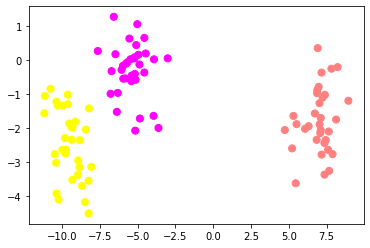

In [253]:
from sklearn.datasets.samples_generator import make_blobs 

x,y = make_blobs(n_samples=100,centers=3,n_features=3)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='spring'); 
plt.show()  

In [256]:
from sklearn.svm import SVC # Support Vector Classifier

print(sample_df.shape)


(9001, 17973)
